In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_,y_train,y_=train_test_split(digits.data,digits.target,test_size=0.4)

In [8]:
x_test,x_dev,y_test,y_dev=train_test_split(x_,y_,test_size=0.2)
del x_,y_
len(y_train)

1078

In [9]:
def my_softmax(z):    
    sm=np.exp(z)
    sm2=np.sum(sm)
    a=sm/sm2
    return a

In [10]:
tf.random.set_seed(1234) # for consistent results
model=Sequential([
        tf.keras.layers.Flatten(),
        Dense(64, activation='relu', name = "L1"),
        Dense(32, activation='relu',  name = "L2"),
        Dense(10, activation='linear', name = "L3"),
    
    
])

In [11]:
# model.summary()

In [13]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(
    x_train,y_train,
    epochs=100
)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9964 - loss: 0.0066     
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 1.0000 - loss: 0.0016
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 1.0000 - loss: 2.2226e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 1.0000 - loss: 1.2519e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 1.0000 - loss: 1.0573e-04
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 1.0000 - loss: 9.4051e-05
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 1.0000 - loss: 8.5077e-05
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 1.0000 - loss: 7.7979e-05
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 1.0000 - loss: 7.2013e-05
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 1.0000 - loss: 6.6777e-05
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 1.0000 - loss: 6.2257e-05


In [14]:
training_1=model.predict(x_train)
training_1=model.predict(x_dev)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [15]:
training_1= tf.nn.softmax(training_1)
print(training_1[0],"%0.2f")
for i in range(0,10):
    if(training_1[0][i]>=0.5):
        print("number is - ",i)
# model.evaluate(training_1,y_dev)
print(y_dev[0])

tf.Tensor(
[4.6554582e-15 6.9401746e-14 8.0997890e-17 1.6073429e-08 1.0622875e-23
 1.0000000e+00 1.2005602e-24 5.9250995e-23 1.4442431e-13 8.2311353e-18], shape=(10,), dtype=float32) %0.2f
number is -  5
5


In [16]:
training_2=model.predict(x_test)
training_2= tf.nn.softmax(training_2)
# print(training_2[0])
for i in range(0,10):
    if(training_2[0][i]>=0.5):
        print("number is - ",i)
print(y_test[0])


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
number is -  3
3


In [17]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

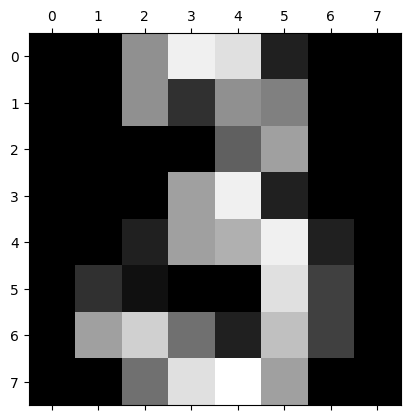

In [18]:
plt.gray()
plt.matshow(digits.images[999])
plt.show()

In [19]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

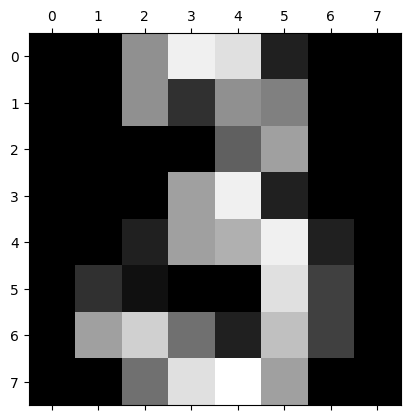

[[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]]


In [20]:
plt.gray()
plt.matshow(digits.images[999])
plt.show()
c=digits.data[3:4]
print(c)

In [21]:
training_3=model.predict(c)
training_3= tf.nn.softmax(training_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [22]:
for i in range(0,10):
    if(training_3[0][i]>=0.5):
        print("Number is - ",i,"\n")
    

Number is -  3 



In [23]:
import joblib # type: ignore
joblib.dump(model, "model.joblib")


['model.joblib']

In [24]:
saved_model = joblib.load("model.joblib")
print(saved_model)

<Sequential name=sequential, built=True>


In [26]:
import pickle# type: ignore
with open("modelpredict.pkl", "wb") as file:
    pickle.dump(model, file)

In [27]:
# Save model
model.save("modelpredict2.h5")